In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
Hello = tf.constant("Herro")

In [3]:
World = tf.constant("World")

In [4]:
with tf.Session() as sess:
    result = sess.run(Hello + World)

In [5]:
result

b'HerroWorld'

In [6]:
a = tf.constant(1)

In [7]:
b = tf.constant(2
            )

In [8]:
a + b


<tf.Tensor 'add_1:0' shape=() dtype=int32>

In [9]:
a + b

<tf.Tensor 'add_2:0' shape=() dtype=int32>

In [10]:
with tf.Session() as sess:
    result = sess.run(a + b)

In [11]:
result

3

In [12]:
#random normal distribution
distRand = tf.random_normal((4,4), mean = 0, stddev = 1000)

In [13]:
#random uniform distribution
distUni = tf.random_uniform((4,4), minval=-100, maxval=100)

In [14]:
#Graphs
node1 = tf.constant(10)
node2 = tf.constant(10)
node3 = node1 + node2

In [15]:
with tf.Session() as sess:
    result = sess.run(node3)

In [16]:
result

20

In [17]:
#Placeholders and Variables-

In [18]:
tensor = tf.random_normal((4,4), 0, 1)

In [19]:
variable = tf.Variable(initial_value=tensor)

In [20]:
sess = tf.InteractiveSession()

In [21]:
init = tf.global_variables_initializer()
sess.run(init)
sess.run(variable
        )

array([[-0.43078804, -0.3823491 ,  1.24546826,  0.4868446 ],
       [ 0.33280072,  0.134642  ,  0.92750514, -0.03582337],
       [ 0.14682984,  1.58112884,  0.74810088,  0.35927474],
       [ 0.24329996, -1.93281078,  1.80112386, -1.19873261]], dtype=float32)

In [22]:
#simple quick classification NN

In [23]:
np.random.seed(101)

In [24]:
tf.set_random_seed(101)

In [25]:
#Gurt out some random data points
random_points = np.random.uniform(0, 100, (5,5))

In [26]:
random_points_2 = np.random.uniform(0, 100, (5,1))

In [27]:
random_points

array([[ 51.63986277,  57.06675869,   2.84742265,  17.15216562,
         68.52769817],
       [ 83.38968626,  30.69662197,  89.36130797,  72.15438618,
         18.99389542],
       [ 55.42275911,  35.2131954 ,  18.18924027,  78.56017619,
         96.54832224],
       [ 23.23536618,   8.35614337,  60.35484223,  72.89927573,
         27.62388285],
       [ 68.53063288,  51.78674742,   4.84845374,  13.78692376,
         18.69674261]])

In [28]:
random_points_2


array([[ 99.43179012],
       [ 52.06653967],
       [ 57.87895355],
       [ 73.48190583],
       [ 54.19617722]])

In [29]:
a = tf.placeholder(tf.float32)

In [30]:
b = tf.placeholder(tf.float32
                  )

In [31]:
add = a + b

In [32]:
mult_cult = tf.matmul(a, b)

In [33]:
with tf.Session() as sess:
    result = sess.run(add, feed_dict={a: random_points, b: random_points_2})
    print(result)

[[ 151.07165527  156.49855042  102.27921295  116.58396149  167.95948792]
 [ 135.45622253   82.76316071  141.42784119  124.22093201   71.06043243]
 [ 113.30171204   93.09214783   76.06819153  136.43911743  154.42727661]
 [  96.7172699    81.83804321  133.83674622  146.38117981  101.10578918]
 [ 122.72680664  105.98292542   59.04463196   67.98310089   72.89292145]]


In [34]:
n1_features = 10
#3 layers of dense neurons
n1_neurons = 3

In [35]:
x = tf.placeholder(tf.float32, (None, n1_features))

In [36]:
W = tf.Variable(tf.random_normal([n1_features, n1_neurons]))

In [37]:
b = tf.Variable(tf.ones(n1_neurons))

In [38]:
xW = tf.matmul(x, W)

In [39]:
z = tf.add(xW , b)

In [40]:
#activation function yeet
a = tf.sigmoid(z)

In [41]:
init = tf.global_variables_initializer()

In [42]:
with tf.Session() as ur_mom:
    ur_mom.run(init)
    
    result = ur_mom.run(a, feed_dict={x: np.random.random([2, n1_features])})

In [43]:
result

array([[ 0.23555243,  0.36481911,  0.86216408],
       [ 0.41411948,  0.40697414,  0.82243335]], dtype=float32)

In [44]:
#regression lmao

In [45]:
noise_1 = np.random.uniform(-1.5, 1.5, 10)

In [46]:
x_data = np.linspace(0,10,10) + noise_1

In [47]:
noise_2 = np.random.uniform(-1.5, 1.5, 10)

In [48]:
y_complements = np.linspace(0,10,10) + noise_2

In [49]:
#plot data

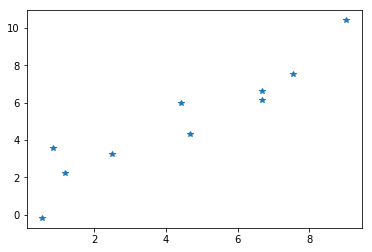

In [50]:
plt.plot(x_data, y_complements, "*")

In [51]:
#because np.random.rand() returns an array the [0] is nescesary
b = tf.Variable(np.random.rand(1)[0])
m = tf.Variable(np.random.rand(1)[0])

In [52]:
error = 0

for x,y in zip(x_data, y_complements):
    y_hat = (m*x) + b
    #want to minimize this
    error += (y - y_hat)**2

In [53]:
peepee = tf.train.GradientDescentOptimizer(learning_rate = 0.001)
train = peepee.minimize(error)

In [54]:
init = tf.global_variables_initializer()

In [55]:
with tf.Session() as ur_mom:
    ur_mom.run(init)
    training_steps = 1000
    for i in range(training_steps):
        ur_mom.run(train)
    final_slope, final_intercept = ur_mom.run([m,b])

In [56]:
x_pred_graph = np.linspace(-1, 11, 10)
y_pred_plot = final_slope * x_pred_graph + final_intercept

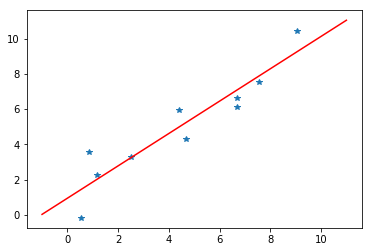

In [57]:
plt.plot(x_data, y_complements, "*")
plt.plot(x_pred_graph, y_pred_plot, "r")

In [58]:
#Boggers more regression
#massive dataset haha ues
x_2_data = np.linspace(0,10,100000)

In [59]:
noise_2 = np.random.uniform(-2, 2, len(x_2_data))

In [60]:
y_2_data = (0.76) * x_2_data + 5 + noise_2

In [61]:
x_1_df = pd.DataFrame(data = x_2_data, columns=['X DATA'])

In [62]:
y_1_df = pd.DataFrame(data = y_2_data, columns = ['TRUE Y VALUES'])

In [63]:
my_data_2 = pd.concat([x_1_df, y_1_df], axis=1)

In [64]:
my_data_2.head()

,X DATA,TRUE Y VALUES
0,0.0000,5.607071
1,0.0001,4.698352
2,0.0002,5.626533
3,0.0003,3.836874
4,0.0004,5.640002


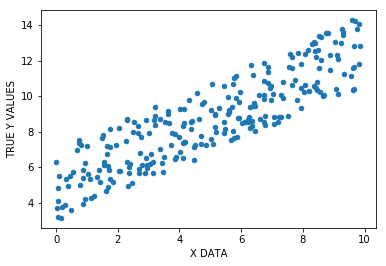

In [65]:
my_data_2.sample(250).plot(x = 'X DATA', y = 'TRUE Y VALUES', kind = 'scatter')

In [72]:
batch_size_A = 8

In [73]:
np.random.randn(2)

array([-0.61776593,  0.25612231])

In [74]:
m = tf.Variable(-0.61066939)
b = tf.Variable(0.25343875)

In [76]:
yph = tf.placeholder(tf.float32, [batch_size_A])

In [78]:
xph = tf.placeholder(tf.float32, [batch_size_A])

In [79]:
y_model_A = m*xph + b
error_A = tf.reduce_sum(tf.square(yph - y_model_A))

In [84]:
optimizer_A = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train_A = optimizer_A.minimize(error_A)

In [85]:
init = tf.global_variables_initializer()

In [95]:
with tf.Session() as sess_kai:
    sess_kai.run(init)
    batches_A = 1000
    for i in range(batches_A):
        rand_ind_A = np.random.randint(len(x_2_data), size = batch_size_A)
        feed_A = {xph : x_2_data[rand_ind_A], yph : y_2_data[rand_ind_A]}
        sess_kai.run(error, feed_dict=feed_A)
    final_slope_A , final_intecept_A = sess_kai.run([m,b])  

In [98]:
final_slope_A

-0.61066937

In [100]:
final_intecept_A

0.25343874